In [118]:
from math import e
import math
import numpy as np
import os
import matplotlib.cbook as cbook
import matplotlib.image as image
from matplotlib.image import imread
import matplotlib.pyplot as plt
from skimage import color
from skimage import io
from PIL import Image
import random
import time
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
%cd /content/drive/MyDrive/AA_assignment_cs469_cs900

/content/drive/MyDrive/AA_assignment_cs469_cs900


<b>DFT</b>

In [ ]:
def DFT(x):
    x = np.asarray(x, dtype=complex)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

<b>FFT</b>

In [ ]:
def FFT(P):
    P = np.asarray(P, dtype=complex)
    n = len(P)
    if n==1:
        return P
    if n % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    y = [0] * n
    w = math.e ** (2 * math.pi * 1j / n)
    root = 1
    p_even,p_odd = P[::2],P[1::2]
    y_even,y_odd = FFT(p_even),FFT(p_odd)
    for m in range(0,int(n/2)):
        y[m] = y_even[m] + root * y_odd[m]
        y[int(m + n/2)] = y_even[m] - root * y_odd[m]
        root = root*w
    return y

<b> 2D FFT </b>

In [ ]:
def FFT2D(matrix,row_size,col_size):
    z_rows = np.zeros((row_size,col_size),dtype=complex)
    z_cols = np.zeros((row_size,col_size),dtype=complex)
    for i in range(len(matrix)):
        z_rows[i] = FFT(matrix[i])
    for i in range(len(z_rows[0])):
        z_cols[:,i] = FFT(z_rows[:,i])
    return z_cols

<b>IFFT</b>

In [ ]:
def IFFT(x):
    x = np.asarray(x, dtype=complex)
    x_conjugate = np.conjugate(x)

    y = FFT(x_conjugate)

    y = np.conjugate(y)
    y = y / x.shape[0]

    return y

<b> 2D IFFT </b>

In [ ]:
def IFFT2D(matrix,row_size,col_size):
    z_rows = np.zeros((row_size,col_size),dtype=complex)
    z_cols = np.zeros((row_size,col_size),dtype=complex)
    for i in range(len(matrix)):
        z_rows[i] = IFFT(matrix[i])
    for i in range(len(z_rows[0])):
        z_cols[:,i] = IFFT(z_rows[:,i])
    return z_cols

<b> Convolution for loop </b>

In [ ]:
def convolution_for_loop(a,b):
    a_len = len(a)
    b_len = len(b)
    n = a_len + b_len
    list_ = []
    for i in range(n):
        list_.append(0)
    for i in range(a_len):
        for j in range(b_len):
            list_[i+j] += a[i] * b[j]
            
    return list_

In [ ]:
def check(a, b):
    for i in range(len(a)):
        if(a[i]!=b[i]):
            return False
    return True 

<b>Implementing 1D FFT and DFT</b> 

<b> Sample Execution for polynomial of size two </b>

In [ ]:
x = 2
arr1_size=2
arr2_size=2
inp1 = np.random.randint(17,size=arr1_size)
inp2 = np.random.randint(13,size=arr2_size)

In [ ]:
print(inp1)
print(inp2)

[ 8 14]
[ 4 12]


In [ ]:
# append zeroes to the array to make it of size 2n
arr1 = np.pad(inp1, (0, x), 'constant', constant_values=(0))
arr2 = np.pad(inp2, (0, x), 'constant', constant_values=(0))
print(arr1)
print(arr2)

[ 8 14  0  0]
[ 4 12  0  0]


In [ ]:
print(DFT(arr1))

[22.+0.00000000e+00j  8.-1.40000000e+01j -6.-1.71450552e-15j
  8.+1.40000000e+01j]


In [ ]:
print(DFT(arr2))

[16.+0.00000000e+00j  4.-1.20000000e+01j -8.-1.46957616e-15j
  4.+1.20000000e+01j]


In [ ]:
print(FFT(arr1))

[(22+0j), (8+14j), (-6+0j), (7.999999999999999-14j)]


In [ ]:
print(FFT(arr2))

[(16+0j), (4.000000000000001+12j), (-8+0j), (3.999999999999999-12j)]


In [ ]:
# obtain pv form by np.multiply
y1 = FFT(arr1)
y2 = FFT(arr2)
result = np.multiply(y1,y2)
result

array([ 352.  +0.j, -136.+152.j,   48.  -0.j, -136.-152.j])

In [ ]:
# the result is CR form of the resultant polynomial
answer = IFFT(result)
answer.real

array([ 32., 152., 168.,   0.])

In [ ]:
# check the correctness of IFFT result by comparing it with the result of the convolution for loop
check_result = convolution_for_loop(inp1,inp2)
check_result

[32, 152, 168, 0]

<b> 2D FFT </b>

In [ ]:
# randomly generate square matrix of size mat_size
# as per the question the lower_limit is zero and upper_limit is 255
mat_row_size = 4
mat_col_size = 4
upper_limit = 255
lower_limit=0
matrix = np.random.randint(lower_limit,upper_limit,size=(mat_row_size,mat_col_size))

In [ ]:
# display the matrix
matrix

array([[196, 244, 140,   1],
       [ 21, 164, 224, 121],
       [249, 116, 234, 231],
       [ 90,  97, 135,  91]])

In [ ]:
# apply 2DFFT on the matrix
answer_matrix =  FFT2D(matrix,mat_row_size,mat_col_size)
answer_matrix

array([[2354.  +0.j, -177.+177.j,  224.  +0.j, -177.-177.j],
       [-249.+117.j,    4.+200.j,  -45. -77.j,   78.-516.j],
       [ 468.  +0.j,  319. +79.j,  230.  +0.j,  319. -79.j],
       [-249.-117.j,   78.+516.j,  -45. +77.j,    4.-200.j]])

In [ ]:
# apply 2DIFFT on the matrix
rows = answer_matrix.shape[0]
cols = answer_matrix.shape[1]
ifft_answer = IFFT2D(answer_matrix,rows,cols)
ifft_answer

array([[196.-0.00000000e+00j, 244.+1.95943488e-15j, 140.-0.00000000e+00j,
          1.-1.95943488e-15j],
       [ 21.-2.11251573e-15j, 164.+2.80137955e-15j, 224.+2.72483913e-15j,
        121.+1.68388935e-16j],
       [249.-0.00000000e+00j, 116.+1.95943488e-15j, 234.-0.00000000e+00j,
        231.-1.95943488e-15j],
       [ 90.+2.11251573e-15j,  97.-1.30118722e-15j, 135.-2.72483913e-15j,
         91.-1.66858126e-15j]])

<b>RSA implementation</b>


In [ ]:
# modular expo function determines the value of (a power b) mod n
def modular_expo(a,u,n):
    c=0
    d=1
    b=bin(u)[2:]
    for i in range(len(b)):
        c=2*c
        d=(d*d)%n
        if(b[i] == '1'):
            c+=1
            d=(d*a)%n
    return d

In [ ]:
# called from primality test of miller rabin
# if witness function returns true then it is a composite number
# else its a prime number
def witness(a,n):
        u=n-1
        t=0
        s=bin(u)[2:]
        s=s[::-1]
        for i in range(len(s)):
            if s[i]=='0':
                t+=1
            else:
                break        
        res=[]
        res.append(modular_expo(a,u,n))
        
        for i in range(1,t):
            res.append(res[i-1]**2%n)
            if res[i]==1 and res[i-1]!=1 and res[i-1]!=n-1:
                return True
        if res[t-1]!=1:
            return True
        return False

In [ ]:
# primality test code 
# checks if a number is prime or not
# return true if its a prime number else returns false
def MILLER_RABIN(n):
    for i in range(1,21):
        a=random.randint(1,n-1)
        if(witness(a,n)):
            return False
    return True

In [ ]:
# random.getrandbits function generates random integers of specified bits
# if the number mod 2 is zero then definitely its a composite number
# if not then do a primality test on the number
def getLargePrime():
    while(1):
        get_prime = random.getrandbits(128)
        if(get_prime%2==0):
            continue
        elif MILLER_RABIN(get_prime):
            return get_prime

In [ ]:
# returns the coeffcients x and y of the equation gcd of a,b is the min of {ax+by}
def extenedEuclid(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = extenedEuclid(b % a, a)
        return (g, x - (b // a) * y, y)

In [ ]:
# returns the gcd of two numbers a and b
def euclid(a, b):
    while b != 0:
        a, b = b, a % b
    return a

In [ ]:
# p and q are two large prime numbers which are generated
# Compute euler's phi function which in this case of only prime numbers is just (p-1) * (q-1)
# Choose a small odd integer e
# Compute “d” by finding inverse of e with respect to phi
# (e,n) is public key
# (d,n) is private key 

def generate_keyPairs():
    p=getLargePrime()
    q=getLargePrime()
    n = p*q
    phi = (p-1) * (q-1)   
    global e
    for i in range(3,100000):
        if euclid(i,phi)==1:
            e=i
            break
    
    d = extenedEuclid(e, phi)[1]
    d = d % phi
    if(d < 0):
        d += phi
    return ((e,n),(d,n))

In [ ]:
# decrypt using private key
def decrypt(encrypted,private_key):
    try:
        key= private_key[0]
        n = private_key[1]
        ans = [chr(modular_expo(char,key,n)) for char in encrypted]
        return complex("".join(ans))
    except TypeError as e:
        print(e)

In [ ]:
# encrypt using public key
def encrypt(text,public_key):
    key,n = public_key
    ctext = [modular_expo(ord(char),key,n) for char in str(text)]
    return ctext

In [ ]:
# obtain public and private keys
# then encrypt the pv form of the result
# decrypt the encrypted text
public_key,private_key=generate_keyPairs()
def ENCRYPT(val,public_key):
    enc=[]
    for i in val:
        enc.append(encrypt(i,public_key))
    return enc
    
def DECRYPT(val,private_key):
    dec=[]
    for i in val:
        dec.append(decrypt(i,private_key))
    return dec

In [120]:
# decrypted value and the text sent to encryption should be same which means the result of check function must yield true
en_ans = ENCRYPT(result,public_key)
dec_ans = DECRYPT(en_ans,private_key)
print(check(dec_ans,result))

True


In [ ]:
dft_log=open('DFT_summary.txt','a')
fft_log=open('FFT_summary.txt','a')
encryption_log = open('Encryption_summary.txt','a')
decryption_log = open('Decryption_summary.txt','a')

dft_plots=[]
fft_plots=[]
encryption_plots=[]
decryption_plots = []
initial_size = 2

for i in range(1,11):  
    poly_1 = np.random.randint(initial_size, size=(initial_size))
    poly_2 = np.random.randint(initial_size, size=(initial_size))
    
    x=np.pad(poly_1,(0,initial_size),'constant',constant_values=(0))
    y=np.pad(poly_2,(0,initial_size),'constant',constant_values=(0))
  
    start_dft=time.time()
    
    dft_res1=DFT(x)
    dft_res2=DFT(y)
    
    time.sleep(1)
    
    end_dft=time.time()
    dft_plots.append(end_dft-start_dft)
    dft_log.write("input of size " + str(initial_size) + "= " + str(end_dft-start_dft)+'\n')
    
    start_fft = time.time()
    
    fft_res1=FFT(x)
    fft_res2=FFT(y)
    
    time.sleep(1)
    
    end_fft = time.time()
    fft_plots.append(end_fft-start_fft)
    fft_log.write("input of size " + str(initial_size) + "= " + str(end_fft-start_fft)+'\n')
    
    pv_result = np.multiply(fft_res1,fft_res2)
   
 
  
    encryption_start=time.time()
    
    crypted_text=ENCRYPT(pv_result,public_key)
  
    time.sleep(1)
  
    encryption_stop=time.time()
    encryption_plots.append(encryption_stop-encryption_start)
    encryption_log.write(str(encryption_stop-encryption_start)+'\n')

    decryption_start=time.time()
    
    decrypted_text=DECRYPT(crypted_text,private_key)
  
    time.sleep(1)
  
    decryption_stop=time.time()
    decryption_plots.append(decryption_stop-decryption_start)
    decryption_log.write(str(decryption_stop-decryption_start)+'\n')
     
 
    brute_force=convolution_for_loop(x,y)
    
    CR = IFFT(pv_result)
    CR=CR.real
    CR=np.resize(CR,len(brute_force))
    
    for i in range(len(CR)):
        CR[i]=round(CR[i])
    
    CR=CR.astype('int32')
    CR=CR.tolist()

    
    if(check(CR,brute_force)==True):
        print('IFFT and Convolution for loop are same')
  
    initial_size = initial_size*2

dft_log.close()
fft_log.close()
encryption_log.close()
decryption_log.close()

IFFT and Convolution for loop are same


<b>Image Compression using FFT</b>

In [ ]:
plt.rcParams['figure.figsize']= [5,5]
plt.rcParams.update({'font.size':18})

A = imread('aa.jpg')
B=np.mean(A,-1); # converting rgb to grayscale

(-0.5, 1023.5, 1023.5, -0.5)

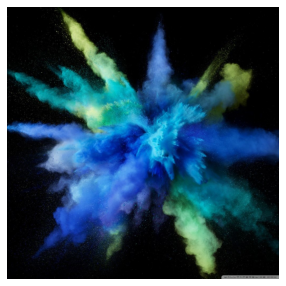

In [ ]:
plt.figure()
plt.imshow(A)
plt.axis('off')

In [ ]:
rows = B.shape[0]
cols = B.shape[1]

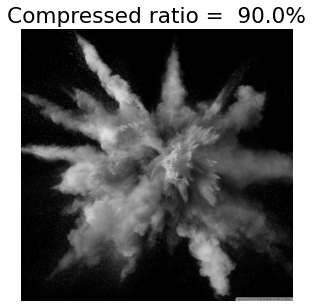

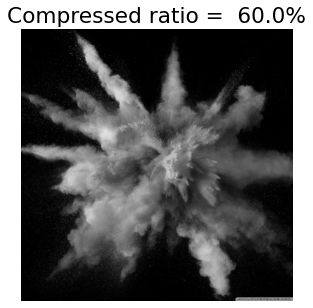

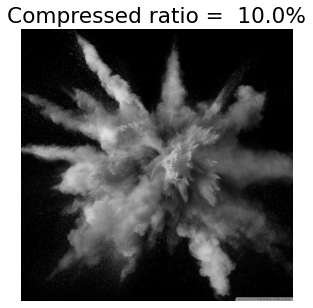

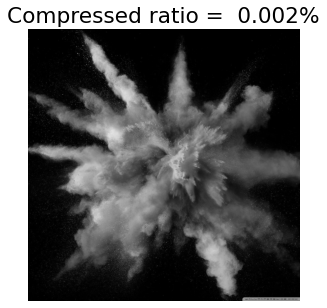

In [ ]:
bt = FFT2D(B,rows,cols)
btsort = np.sort(np.abs(bt.reshape(-1)))
compression_log=open('compression_time_log.txt','a')
for keep in (0.90,0.60,0.10,0.00002):
    start=time.time()
    thresh = btsort[int(np.floor(1-keep)*len(btsort))]
    ind = np.abs(bt)>thresh
    btlow = bt* ind
    atlow = IFFT2D(btlow,rows,cols).real
    plt.figure()
    plt.imshow(atlow,cmap='gray')
    plt.axis('off')
    plt.title('Compressed ratio =  ' + str(keep*100) + '%')
    plt.savefig('Compressed ratio'+ str(keep*100) + '%'+'.jpeg')
    time.sleep(1)
    stop=time.time()
    compression_log.write(str(keep*100)+'% ,'+str(stop-start)+'\n')

compression_log.close()

In [ ]:
ls -l

total 674
-rw------- 1 root root 553580 Dec  5 17:28  AA_assignment_final.ipynb
drwx------ 2 root root   4096 Dec  5 16:58 'compressed images'/
-rw------- 1 root root  31852 Dec  5 17:28 'Compressed ratio0.002%.jpeg'
-rw------- 1 root root  31345 Dec  5 17:28 'Compressed ratio10.0%.jpeg'
-rw------- 1 root root  31448 Dec  5 17:27 'Compressed ratio60.0%.jpeg'
-rw------- 1 root root  31451 Dec  5 17:27 'Compressed ratio90.0%.jpeg'
-rw------- 1 root root    104 Dec  5 17:28  compression_time_log.txt
drwx------ 2 root root   4096 Dec  5 16:59  images/


Time Analysis

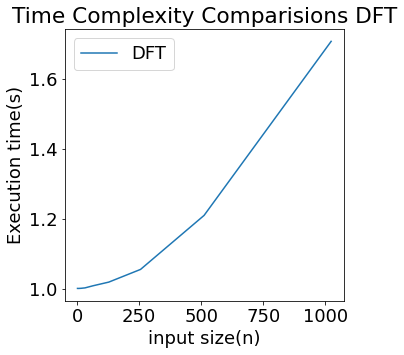

In [ ]:
x = [2,4,8,16,32,64,128,256,512,1024]
y = dft_plots
plt.plot(x, y, label = "DFT")
plt.xlabel("input size(n)") 
plt.ylabel("Execution time(s)")  
plt.title("Time Complexity Comparisions DFT")
plt.legend()

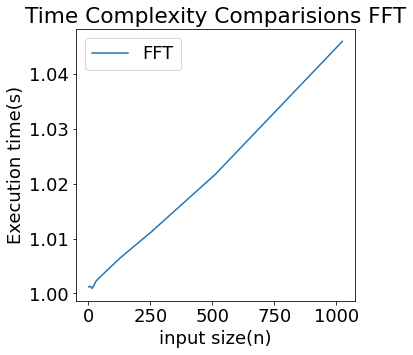

In [ ]:
x = [2,4,8,16,32,64,128,256,512,1024]
y = fft_plots
plt.plot(x, y, label = "FFT")
plt.xlabel("input size(n)") 
plt.ylabel("Execution time(s)")  
plt.title("Time Complexity Comparisions FFT")
plt.legend()

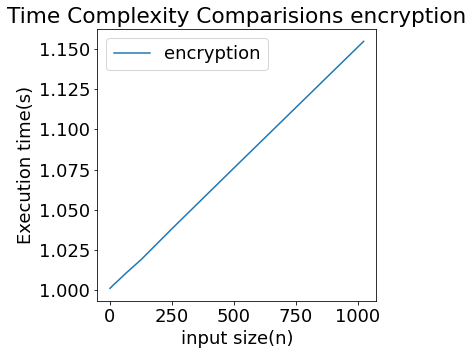

In [ ]:
x = [2,4,8,16,32,64,128,256,512,1024]
y = encryption_plots
plt.plot(x, y, label = "encryption")
plt.xlabel("input size(n)") 
plt.ylabel("Execution time(s)")  
plt.title("Time Complexity Comparisions encryption")
plt.legend()

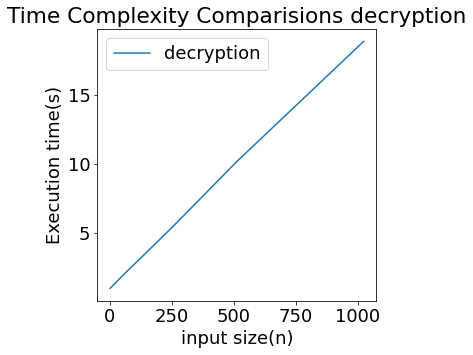

In [ ]:
x = [2,4,8,16,32,64,128,256,512,1024]
y = decryption_plots
plt.plot(x, y, label = "decryption")
plt.xlabel("input size(n)") 
plt.ylabel("Execution time(s)")  
plt.title("Time Complexity Comparisions decryption")
plt.legend()